<a href="https://colab.research.google.com/github/IAlam0819/Assignments/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mounting the Drive**

In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Exploratory Data Analysis**

In [ ]:
#importing the excel file
data = pd.read_excel('/content/gdrive/My Drive/Colab Notebooks/dataset/Data Analyst Assignment .xlsx', sheet_name='Assignment-1')
data.head()

,Date,product,phase,campaign_platform,campaign_type,communication_medium,subchannel,audience_type,creative_type,creative_name,device,age,spends,impressions,clicks,link_clicks
0,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,0.00,2,0,0.0
1,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,25-34,0.00,5,0,0.0
2,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,35-44,0.00,1,0,0.0
3,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,Undetermined,14.63,5,3,0.0
4,2019-10-18,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,53.31,10,2,0.0


In [ ]:
#shape of the data
data.shape

(16834, 16)

In [ ]:
# If there are any null values in data set
data.isnull().values.any()

True

In [ ]:
#missing values
data.isnull().sum()

Date                      0
product                   0
phase                     0
campaign_platform         0
campaign_type             0
communication_medium      0
subchannel                0
audience_type             0
creative_type             0
creative_name             0
device                    0
age                       0
spends                    0
impressions               0
clicks                    0
link_clicks             546
dtype: int64

In [ ]:
#info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16834 entries, 0 to 16833
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  16834 non-null  datetime64[ns]
 1   product               16834 non-null  object        
 2   phase                 16834 non-null  object        
 3   campaign_platform     16834 non-null  object        
 4   campaign_type         16834 non-null  object        
 5   communication_medium  16834 non-null  object        
 6   subchannel            16834 non-null  object        
 7   audience_type         16834 non-null  object        
 8   creative_type         16834 non-null  object        
 9   creative_name         16834 non-null  object        
 10  device                16834 non-null  object        
 11  age                   16834 non-null  object        
 12  spends                16834 non-null  float64       
 13  impressions     

In [ ]:
#info of the numerical variables
data.describe()

,spends,impressions,clicks,link_clicks
count,16834.000000,16834.000000,16834.000000,16288.000000
mean,148.694236,287.959190,11.977783,2.170371
std,483.895724,2444.450313,44.796963,18.659132
min,0.000000,0.000000,0.000000,0.000000
25%,0.180000,3.000000,0.000000,0.000000
50%,22.535000,13.000000,2.000000,0.000000
75%,110.020000,64.000000,8.000000,0.000000
max,9221.960000,67454.000000,1075.000000,450.000000


In [ ]:
#Unique values of the columns
for col in data.columns:
  print(col)
  print(data[col].value_counts())
  print("\n")

Date
2020-01-02    169
2020-01-08    164
2020-01-10    162
2020-01-09    162
2020-01-13    162
             ... 
2020-01-25      7
2020-01-28      7
2020-01-26      7
2020-01-27      7
2019-10-16      4
Name: Date, Length: 257, dtype: int64


product
Product 1    16834
Name: product, dtype: int64


phase
Performance    16834
Name: phase, dtype: int64


campaign_platform
Google Ads      15101
Facebook Ads     1733
Name: campaign_platform, dtype: int64


campaign_type
Search         15101
Conversions     1733
Name: campaign_type, dtype: int64


communication_medium
Search Keywords    15101
Creative            1733
Name: communication_medium, dtype: int64


subchannel
Brand           7853
Generic         4544
Competitor      2704
Facebook Ads    1733
Name: subchannel, dtype: int64


audience_type
'-            15101
Audience 1      813
Audience 2      738
Audience 3      182
Name: audience_type, dtype: int64


creative_type
'-          15101
Image        1130
Carousal      603
Name: creat

In [ ]:
#removing unwanted columns: only one category
data = data.drop(['product', 'phase'], axis=1)
data.shape

(16834, 14)

In [ ]:
#dropping missing values
data = data.dropna()
data.shape

(16288, 14)

<Figure size 432x432 with 0 Axes>

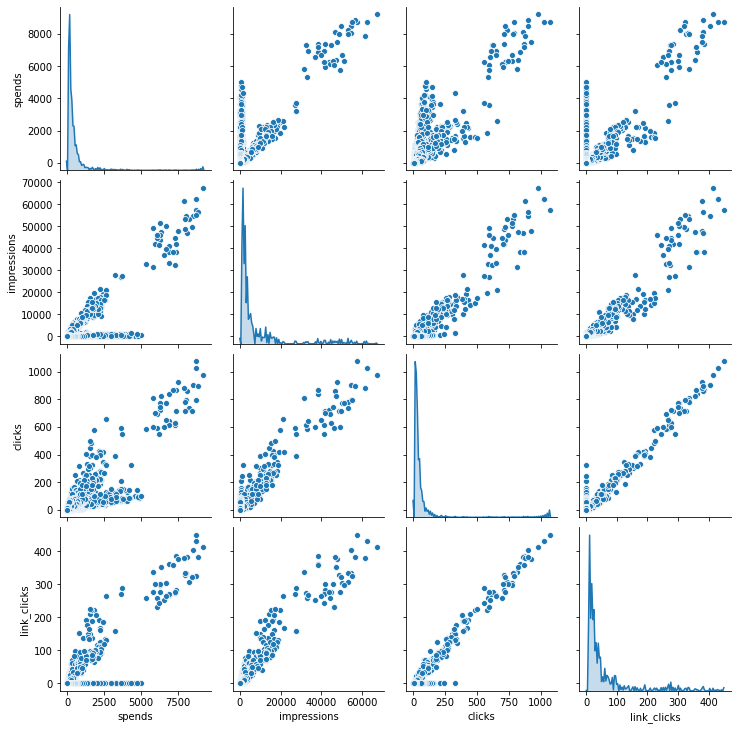

In [ ]:
#pairplot - to see correlation
plt.figure(figsize=(4,4))
sns.pairplot(data,diag_kind='kde')

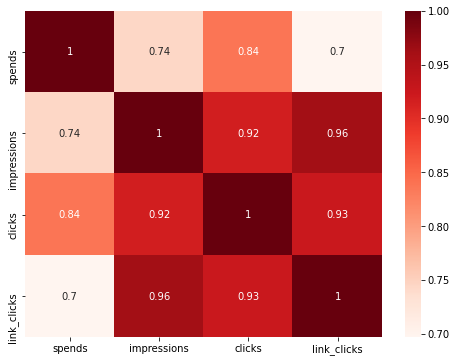

In [ ]:
#heatmap-Using Pearson Correlation
plt.figure(figsize=(8,6))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

# **Data pre-processing**

In [ ]:
#replacing "-'" and 'Undetermined' with NaN
data = data.replace("'-", np.nan)
data = data.replace("Undetermined", np.nan)

In [ ]:
#new missing values
data.isnull().sum()

Date                        0
campaign_platform           0
campaign_type               0
communication_medium        0
subchannel                  0
audience_type           15101
creative_type           15101
creative_name           15101
device                      0
age                      2586
spends                      0
impressions                 0
clicks                      0
link_clicks                 0
dtype: int64

In [ ]:
#imputing the missing values
columns = ['audience_type', 'creative_name', 'creative_type', 'age']

for col in columns:
  p = data[col].value_counts(normalize=True)  # Series of probabilities
  m = data[col].isnull()

  np.random.seed(42)
  rand_fill = np.random.choice(p.index, size=m.sum(), p=p)

  data.loc[m, col] = rand_fill

In [ ]:
#no missing values
data.isnull().sum()

Date                    0
campaign_platform       0
campaign_type           0
communication_medium    0
subchannel              0
audience_type           0
creative_type           0
creative_name           0
device                  0
age                     0
spends                  0
impressions             0
clicks                  0
link_clicks             0
dtype: int64

In [ ]:
data.head()

,Date,campaign_platform,campaign_type,communication_medium,subchannel,audience_type,creative_type,creative_name,device,age,spends,impressions,clicks,link_clicks
0,2019-10-16,Google Ads,Search,Search Keywords,Brand,Audience 1,Image,Click,Desktop,18-24,0.00,2,0,0.0
1,2019-10-16,Google Ads,Search,Search Keywords,Brand,Audience 3,Carousal,Girl,Desktop,25-34,0.00,5,0,0.0
2,2019-10-16,Google Ads,Search,Search Keywords,Brand,Audience 2,Carousal,Carousal,Desktop,35-44,0.00,1,0,0.0
3,2019-10-16,Google Ads,Search,Search Keywords,Brand,Audience 2,Image,Carousal,Desktop,35-44,14.63,5,3,0.0
4,2019-10-18,Google Ads,Search,Search Keywords,Brand,Audience 1,Image,Click,Desktop,18-24,53.31,10,2,0.0


# **One - hot Encoding**

In [ ]:
# label encoding the data 
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 

cat_var = ['campaign_platform', 'campaign_type', 'communication_medium', 'subchannel', 'audience_type',
           'creative_type', 'creative_name', 'device', 'age']

for col in cat_var:
  data[col]= le.fit_transform(data[col])

In [ ]:
data.head() #data is converted into numerical data types.

,Date,campaign_platform,campaign_type,communication_medium,subchannel,audience_type,creative_type,creative_name,device,age,spends,impressions,clicks,link_clicks
0,2019-10-16,1,1,1,0,0,1,1,0,0,0.00,2,0,0.0
1,2019-10-16,1,1,1,0,2,0,2,0,1,0.00,5,0,0.0
2,2019-10-16,1,1,1,0,1,0,0,0,2,0.00,1,0,0.0
3,2019-10-16,1,1,1,0,1,1,0,0,2,14.63,5,3,0.0
4,2019-10-18,1,1,1,0,0,1,1,0,0,53.31,10,2,0.0


# **Prediction**
Taking 'clicks' as the target variable, we are going to predict the variable.

In [ ]:
#dropping "Date" and "link_clicks"
data = data.drop(['Date', 'link_clicks'], axis=1)

In [ ]:
data.head()

,campaign_platform,campaign_type,communication_medium,subchannel,audience_type,creative_type,creative_name,device,age,spends,impressions,clicks
0,1,1,1,0,0,1,1,0,0,0.00,2,0
1,1,1,1,0,2,0,2,0,1,0.00,5,0
2,1,1,1,0,1,0,0,0,2,0.00,1,0
3,1,1,1,0,1,1,0,0,2,14.63,5,3
4,1,1,1,0,0,1,1,0,0,53.31,10,2


In [ ]:
# independant variables
col = list(data.columns)
features = list(set(col) - set(['clicks']))
x = data[features].values
# the dependent variable
y = data['clicks'].values

In [ ]:
print(x.shape)
print(y.shape)

(16288, 11)
(16288,)


In [ ]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(11401, 11)
(4887, 11)
(11401,)
(4887,)


In [ ]:
#Linear Regression
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#intercept
intercept = regression_model.intercept_
print("The intercept for our model is {}".format(intercept))
# regression coefficients 
print('Regression Coefficients: \n', regression_model.coef_)

The intercept for our model is 5.481276803329968
Regression Coefficients: 
 [ 1.56735724  4.45890179  1.50743374  1.29880672 -1.47508023 -1.47508023
 -1.47508023 -1.15154471  0.0118182   0.03153403 -1.29201013]


In [ ]:
#prediction
LR_pred = regression_model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, LR_pred))

print('Coefficient of determination: %.3f'
      % r2_score(y_test, LR_pred))

Mean squared error: 214.01
Coefficient of determination: 0.884
